In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

In [5]:
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


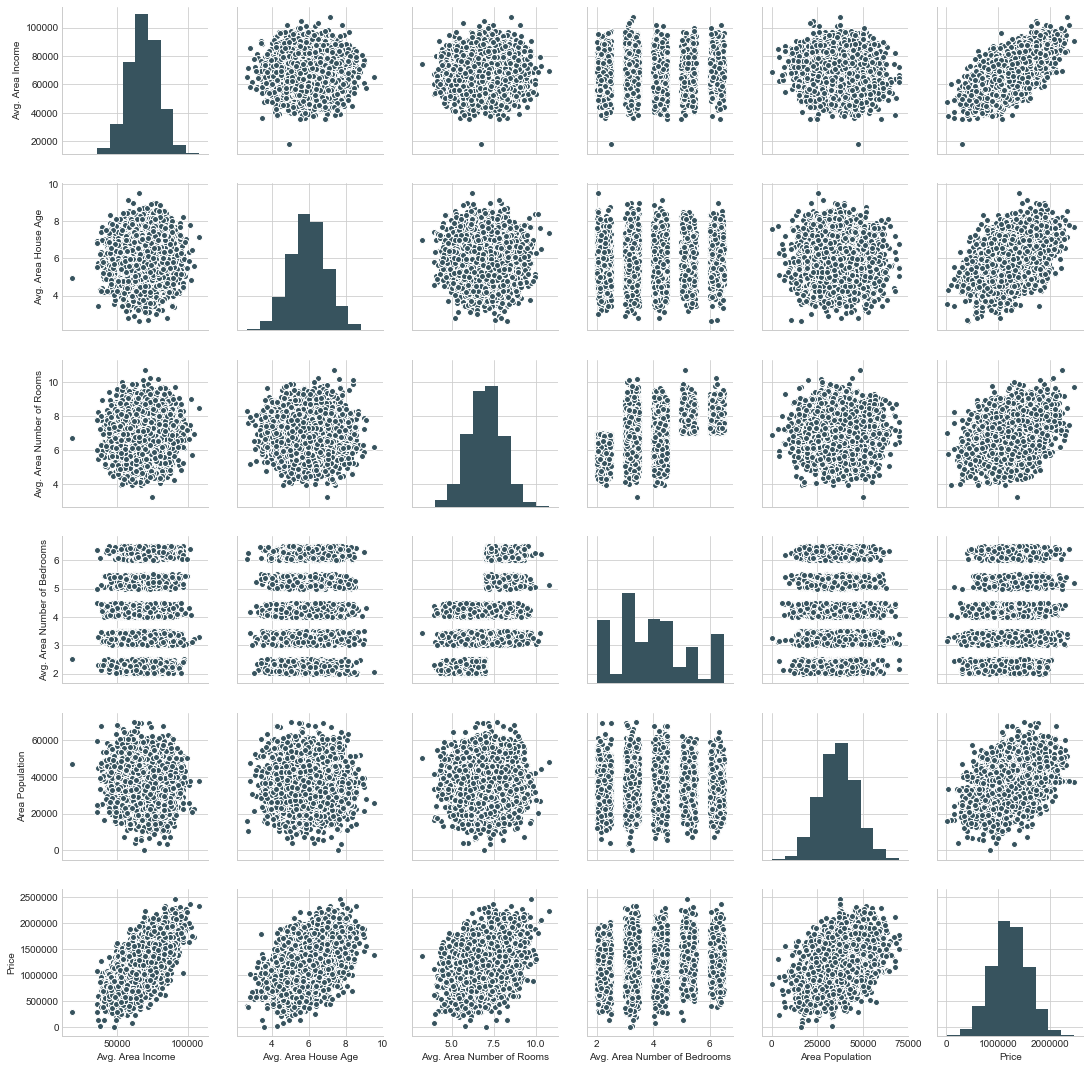

In [7]:
sns.pairplot(df)

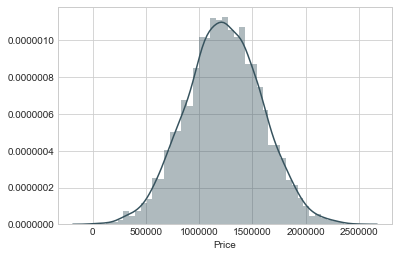

In [11]:
sns.distplot(df['Price'])

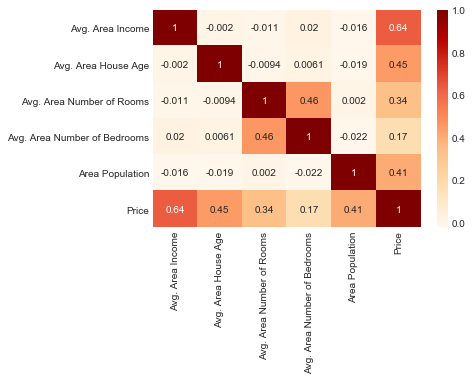

In [17]:
sns.heatmap(df.corr(), annot = True, cmap='OrRd')

In [21]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [30]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

In [31]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [54]:
X= (X-X.mean())/X.std()  #normalizing data
y = (y-y.mean())/y.std()

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 1501 to 2873
Data columns (total 5 columns):
Avg. Area Income                1650 non-null float64
Avg. Area House Age             1650 non-null float64
Avg. Area Number of Rooms       1650 non-null float64
Avg. Area Number of Bedrooms    1650 non-null float64
Area Population                 1650 non-null float64
dtypes: float64(5)
memory usage: 77.3 KB


In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm = LinearRegression()


In [60]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
lm.intercept_

-0.001360198968974542

In [62]:
lm.coef_


array([0.6516379 , 0.46636967, 0.34151599, 0.0066442 , 0.42813656])

In [63]:
predictions = lm.predict(X_test)

In [64]:
(np.abs(predictions - y_test)).mean() #Mean absolut

0.22908460472768893

In [65]:
np.power((predictions - y_test), 2).mean() #Mean square Error

0.08030727957302046

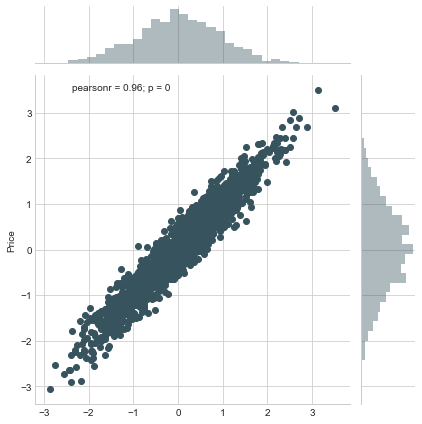

In [66]:
sns.jointplot(predictions, y_test)

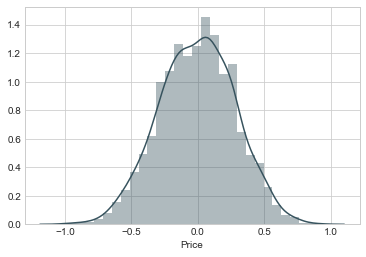

In [67]:
sns.distplot(predictions - y_test)

In [68]:
(predictions - y_test).mean() #mean should be 0

-0.004121815057484824

In [71]:
(predictions - y_test).std() #std can be anything

0.283441317568324

In [72]:
from sklearn import metrics

In [73]:
metrics.mean_absolute_error(y_test, predictions)

0.22908460472768846

In [75]:
np.sqrt(metrics.mean_absolute_error(y_test, predictions)) #Price

0.47862783530389086